<a href="https://colab.research.google.com/github/nik-744/stock-price-prediction-LSTM/blob/main/stock_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance scikit-learn tensorflow pandas numpy

In [9]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [3]:
# Load Data
ticker ="AAPL"
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620842  72.681289  71.373218  71.627092  135480400
2020-01-03  71.914810  72.676439  71.689950  71.847110  146322800
2020-01-06  72.487846  72.526533  70.783248  71.034709  118387200
2020-01-07  72.146942  72.753823  71.926915  72.497529  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200


In [5]:
close = data[['Close']].values

In [6]:
# Data transformation
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close)

In [7]:
x =[]
y=[]
sequence_length = 60
for i in range(sequence_length, len(scaled_close)):
  x.append(scaled_close[i-sequence_length:i])
  y.append(scaled_close[i])

In [8]:
x,y=np.array(x),np.array(y)

In [10]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
model.fit(x,y,batch_size=64,epochs=10)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.1343
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0132
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0061
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0045
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0038
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0039
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0030
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0032
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0031
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0030


In [14]:
predicted = model.predict(x)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1,1))

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


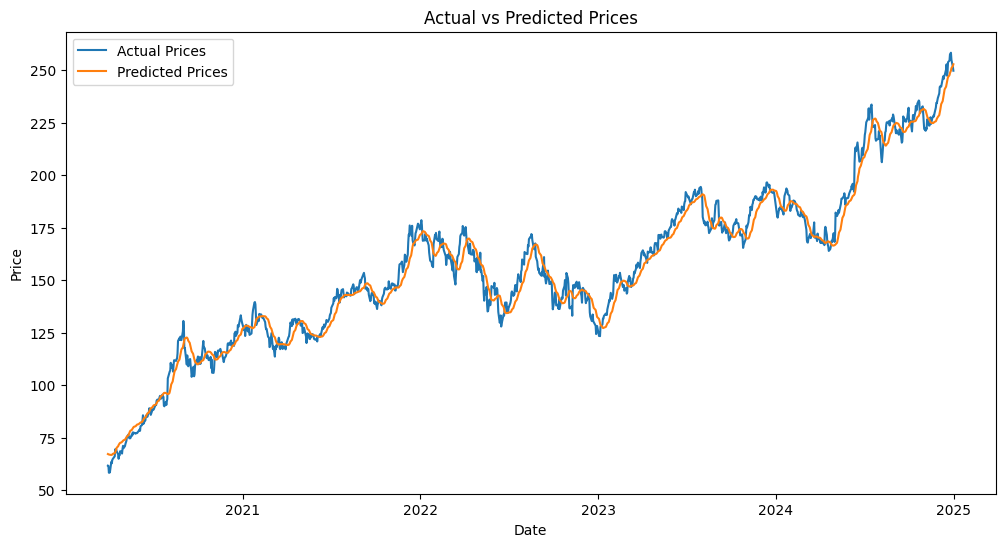

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index[sequence_length:], y=actual_prices.flatten(), label='Actual Prices')
sns.lineplot(x=data.index[sequence_length:], y=predicted_prices.flatten(), label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()